In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Input,Flatten,Dense,Dropout,GlobalMaxPooling2D
from tensorflow.keras.models import Model



In [2]:
cifar100=tf.keras.datasets.cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
x_test,x_train=x_test/255,x_train/255
y_test,y_train=y_test.flatten(),y_train.flatten()
print('x_train shape: ',x_train.shape)
print('y_train: ',y_train.shape)

x_train shape:  (50000, 32, 32, 3)
y_train:  (50000,)


In [3]:
k=len(set(y_train))
print("number of classes: ",k)

number of classes:  100


In [4]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2, activation='relu')(i)
x=Conv2D(64,(3,3),strides=2, activation='relu')(x)
x=Conv2D(128,(3,3),strides=2, activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.4)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)



In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
1563/1563 [==============================] - 14s 5ms/step - loss: 3.7449 - accuracy: 0.1297 - val_loss: 3.2561 - val_accuracy: 0.2119
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 3.1260 - accuracy: 0.2332 - val_loss: 2.9115 - val_accuracy: 0.2749
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8419 - accuracy: 0.2901 - val_loss: 2.7747 - val_accuracy: 0.3110
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.6337 - accuracy: 0.3312 - val_loss: 2.6386 - val_accuracy: 0.3437
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4832 - accuracy: 0.3603 - val_loss: 2.5595 - val_accuracy: 0.3551
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3421 - accuracy: 0.3885 - val_loss: 2.5209 - val_accuracy: 0.3686
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2092 - accuracy: 0.4189 - val_loss: 2.4867 - val_accuracy

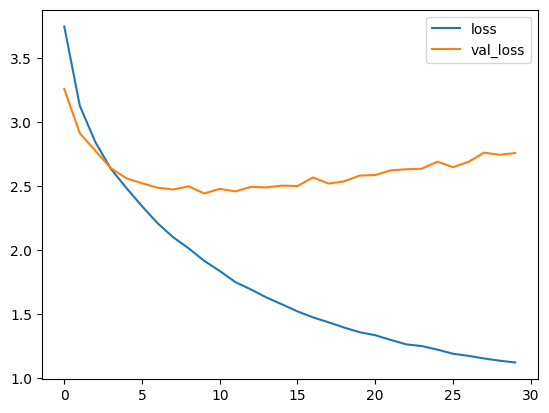

In [6]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

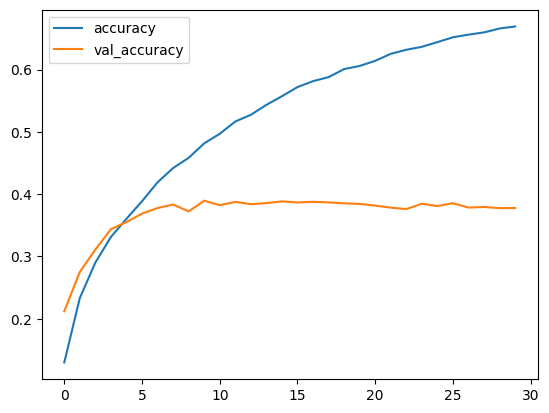

In [7]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[66  3  0 ...  0  0  0]
 [ 3 54  0 ...  0  0  0]
 [ 0  0 30 ...  2  4  0]
 ...
 [ 0  0  0 ... 29  1  0]
 [ 0  0  4 ...  0 15  2]
 [ 0  0  1 ...  1  0 32]]


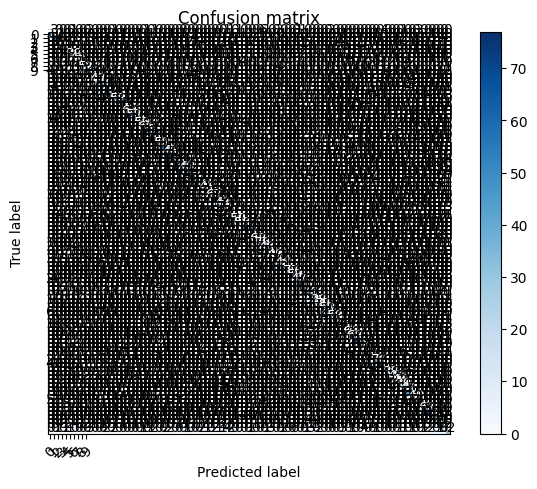

In [8]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
labels = '''
beaver, dolphin, otter, seal, whale, 
aquarium fish, flatfish, ray, shark, trout,
orchids, poppies, roses, sunflowers, tulips,
bottles, bowls, cans, cups, plates,
apples, mushrooms, oranges, pears, sweet peppers,
clock, computer keyboard, lamp, telephone, television,
bed, chair, couch, table, wardrobe,
bee, beetle, butterfly, caterpillar, cockroach,
bear, leopard, lion, tiger, wolf,
bridge, castle, house, road, skyscraper,
cloud, forest, mountain, plain, sea,
camel, cattle, chimpanzee, elephant, kangaroo,
fox, porcupine, possum, raccoon, skunk,
crab, lobster, snail, spider, worm,
baby, boy, girl, man, woman,
crocodile, dinosaur, lizard, snake, turtle,
hamster, mouse, rabbit, shrew, squirrel,
maple tree, oak tree, palm tree, pine tree, willow tree,
bicycle, bus, motorcycle, pickup truck, train,
lawn mower, rocket, streetcar, tank, tractor
'''.split()


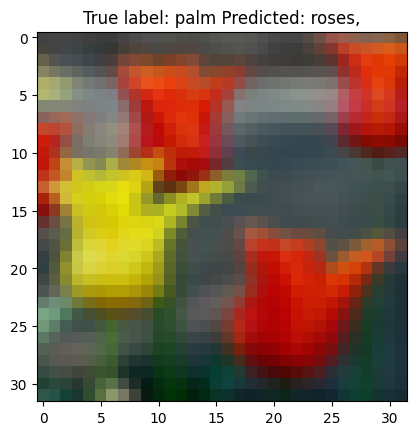

In [16]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));